# Analysis of Large-Scale Collection of Language-Level Provenance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set_theme()

prov_df = pd.read_csv("../output/prov_table.csv", index_col = 0)
func_df = pd.read_csv("../output/func_table.csv", index_col = 0)

## Complete Aggregate Description of the Table

In [2]:
prov_df.describe()

,num_of_lines,num_of_proc_nodes,num_of_data_nodes,num_of_libraries,num_of_functions,num_of_pd_edges,num_of_dp_edges,num_of_fp_edges
count,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000,11463.000000
mean,337.420309,34.392218,29.968158,14.993457,5.075547,27.453110,37.263195,17.673820
std,777.592910,83.042793,111.256454,6.876395,8.038245,101.502168,123.474316,63.578517
min,1.000000,3.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,66.000000,6.000000,1.000000,9.000000,0.000000,1.000000,0.000000,0.000000
50%,143.000000,12.000000,5.000000,13.000000,1.000000,4.000000,2.000000,1.000000
75%,347.000000,31.000000,26.000000,19.000000,7.000000,22.500000,28.000000,13.000000
max,31931.000000,3612.000000,6825.000000,69.000000,83.000000,6824.000000,4626.000000,4155.000000


## Aggregate Description of Scripts That Did Not Throw Errors

In [3]:
successful_df = prov_df[prov_df.error == False]
successful_df.describe()

,num_of_lines,num_of_proc_nodes,num_of_data_nodes,num_of_libraries,num_of_functions,num_of_pd_edges,num_of_dp_edges,num_of_fp_edges
count,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000,4069.000000
mean,256.472352,57.816171,53.882526,14.410174,9.009093,50.223888,72.139101,34.314819
std,697.267264,98.103454,134.264386,6.449837,9.434850,112.849417,169.106466,69.948031
min,1.000000,3.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,12.000000,7.000000,9.000000,2.000000,6.000000,4.000000,2.000000
50%,119.000000,28.000000,23.000000,12.000000,6.000000,21.000000,25.000000,13.000000
75%,265.000000,65.000000,60.000000,18.000000,14.000000,56.000000,78.000000,37.000000
max,31931.000000,1930.000000,5279.000000,69.000000,74.000000,3530.000000,4626.000000,1536.000000


## Relationship of LoC to Procedure Nodes

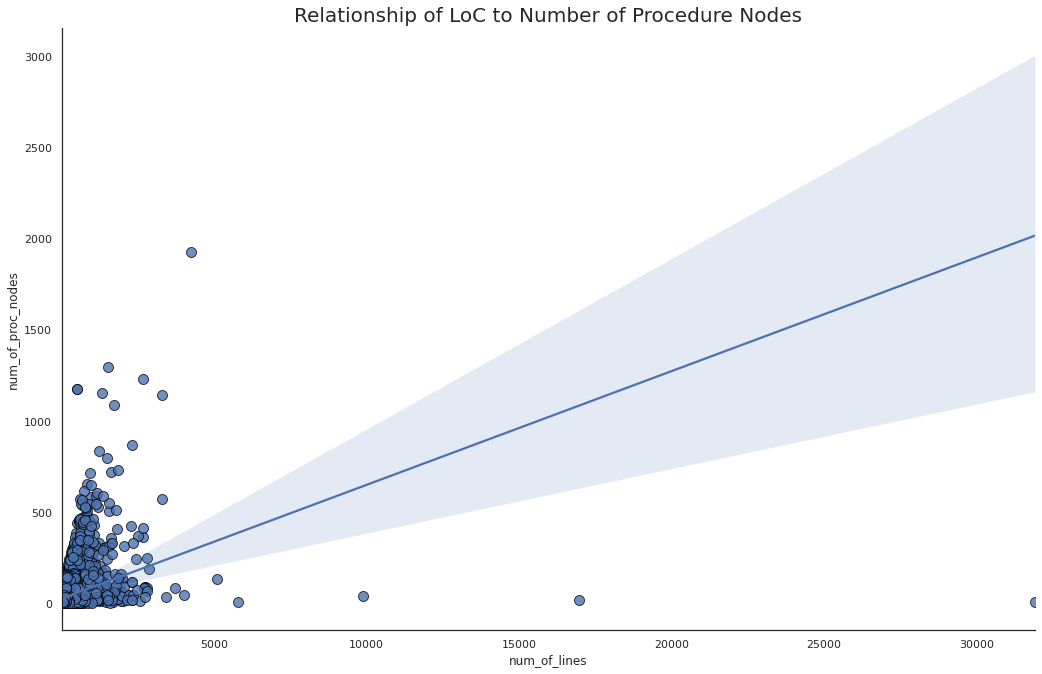

In [4]:
sns.set_style("white")
# CI is set to 95 by default
gridobj = sns.lmplot(x="num_of_lines", y="num_of_proc_nodes", data=successful_df,
                     height=9, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=100, linewidths=.9, edgecolors='black'))
#gridobj.set(ylim=(0, 1500))
#gridobj.set(xlim=(0, 3000))
plt.title("Relationship of LoC to Number of Procedure Nodes", fontsize=20)
plt.show()

In [30]:
func_df.groupby(["doi", "script_name", "library_name"]).count()

function_name
doi                    script_name                       library_name                 
doi:10.7910/DVN/00PDOV code.R                            dynamicTreeCut              1
                                                         fastcluster                 1
                                                         stats                       1
                                                         utils                       2
doi:10.7910/DVN/03CDTK singh_thornton_APSR_replication.R grDevices                   2
...                                                                                ...
doi:10.7910/DVN/ZZZSOR Figures_Main_Text.R               ggplot2                    18
                                                         grDevices                   2
                                                         grid                        1
                                                         gridExtra                   2
                                                         utils                       1

[23512 rows x 1 columns]